In [3]:
##

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read the csv file
df = pd.read_csv('top50.csv', encoding = 'latin-1')

In [5]:
print(df.shape)
print(df.columns)

df.head()

(50, 14)
Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
df.dtypes

Unnamed: 0           int64
Track.Name          object
Artist.Name         object
Genre               object
Beats.Per.Minute     int64
Energy               int64
Danceability         int64
Loudness..dB..       int64
Liveness             int64
Valence.             int64
Length.              int64
Acousticness..       int64
Speechiness.         int64
Popularity           int64
dtype: object

In [100]:
df['Loudness..dB..'].unique()

array([ -6,  -4,  -8,  -5, -11,  -2,  -7,  -3,  -9])

In [ ]:
# df[df['Length.']==df['Length.'].max()]

In [7]:
#     • Display details of the songs that have popularity above 80
print(df[df.Popularity > 80].shape)
#     • Which is having maximum length, beats per minute?
print(df['Length.'].max())
print('Maximum value for Beats.Per.Minute = ',df['Beats.Per.Minute'].max())

#     • Which is having minimum length, beats per minute?
print(df['Length.'].min())
print('Maximum value for Beats.Per.Minute = ',df['Beats.Per.Minute'].min())

#     • Create new column <track_name_length> to store string length
df['track_name_length'] = df['Track.Name'].apply(lambda x: len(x))

#     • Create new column <Artist_first_name> to store first name of each artist
df['Artist_first_name'] = df['Artist.Name'].apply(lambda x: x.split(' ')[0])

#     • How many songs from “dance pop” genre?
print(df[df.Genre=='dance pop'].shape[0])

#     • What is average 'Length.' for each genre?
df2 = df.groupby('Genre')['Length.'].mean()

#     • What is average length for each artist?
df2 = df.groupby('Artist.Name')['Length.'].mean()

#     • What is maximum length for each genre?
df2 = df.groupby('Genre')['Length.'].max()

#     • What is maximum length for each artist?
df2 = df.groupby('Artist.Name')['Length.'].max()

#     • How many songs share same popularity?

df2 = df.groupby('Popularity')['Track.Name'].count()

#     • Rank each song based on popularity.
df2 = df.groupby('Popularity')['Track.Name'].transform(lambda x: x.rank())

#     • Rank each song based on danceability.
df2 = df.groupby('Danceability')['Track.Name'].transform(lambda x: x.rank())

#     • Average, Maximum, Minimum, standard deviation of each column
numerical_columns = df.select_dtypes(include=[number])

def mean(series):
    return np.mean(series)
df[numerical_columns].apply(mean)
#     • Average, Maximum, Minimum, standard deviation of each row
def mean(series):
    return np.mean(series)
df[numerical_columns].apply(mean, axis = 1)

#     • Add a new column <length_variance> where each row will represent difference between row value and
#     mean of the each genre group.

df['length_variance'] = df.groupby('Genre')['Length.'].transform(lambda x: x - np.mean(x))

#     • Take log transform on Loudness DB and add as <log_loudness_db> column
df['log_loudness_db'] = np.log(np.abs(df['Loudness..dB..']))

#     • Visualize if there is linear correlation between beats per minutes and popularity, danceability and
#     popularity, energy and popularity
cols = ['Danceability','Beats.Per.Minute','Popularity','Energy']
import seaborn as sns
sns.pairplot(df[cols])


#     • What is distribution of popularity with respect to energy
#     • What is distribution of popularity with respect to beats. Per minute
#     • Are there any outliers in popularity, danceability, beats per minute?
#     • Visual each artist distribution
#     • Visual each track name distribution
#     • Visual each genre distribution
#     • Visual artist, track, genre distribution using subplots

(46, 14)
309
Maximum value for Beats.Per.Minute =  190


In [107]:
# • What is distribution of popularity with respect to energy

# sns.countplot('Popularity', hue ='Loudness..dB..' ,data = df)

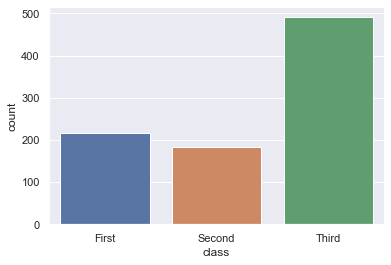

In [106]:
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class",data=titanic, )

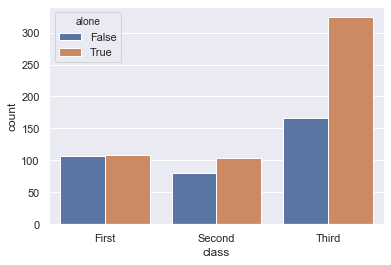

In [104]:
import seaborn as sns
sns.set(style="darkgrid")
titanic = sns.load_dataset("titanic")
ax = sns.countplot(x="class", hue = 'alone',data=titanic, )

In [108]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


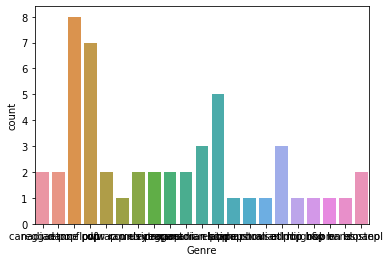

In [92]:
# • Visual each genre distribution
sns.countplot(df['Genre'])

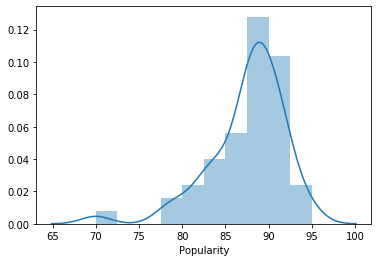

In [93]:
# • What is distribution of popularity

sns.distplot(df['Popularity'])

(array([ 1.,  0.,  0.,  2.,  3.,  5.,  7., 16., 13.,  3.]),
 array([70. , 72.5, 75. , 77.5, 80. , 82.5, 85. , 87.5, 90. , 92.5, 95. ]),
 <a list of 10 Patch objects>)

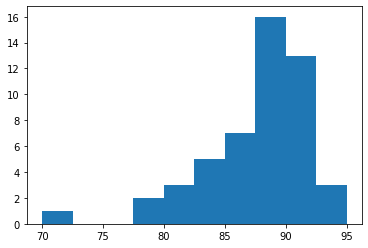

In [94]:
plt.hist(df['Popularity'])

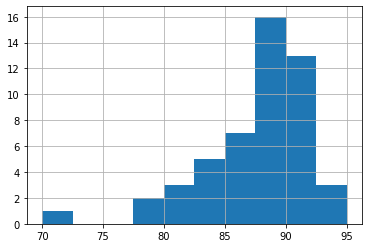

In [95]:
df['Popularity'].hist()

In [17]:
df['Artist_first_name'] = df['Artist.Name'].apply(lambda x: x.split(' ')[0])

In [18]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,rack_name_length,track_name_length,Artist_first_name
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,8,8,Shawn
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,5,5,Anuel
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,29,29,Ariana
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,31,31,Ed
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,27,27,Post


In [69]:
#     • Average, Maximum, Minimum, standard deviation of each column

def mean(series):
    return np.mean(series)

# loop 
df[numerical_columns].apply(mean)
df[numerical_columns].apply(lambda x: np.mean(x))
df[numerical_columns].apply(lambda x : min(x))
df[numerical_columns].apply(lambda x : max(x))
df[numerical_columns].apply(lambda x : np.std(x))
# dataframe
# concatenation





Unnamed: 0           14.430870
Beats.Per.Minute     30.587847
Energy               14.088875
Danceability         11.809979
Loudness..dB..        2.035780
Liveness             11.006562
Valence.             22.111535
Length.              38.750463
Acousticness..       18.804638
Speechiness.         11.049416
Popularity            4.446347
rack_name_length     14.490493
track_name_length    14.490493
dtype: float64

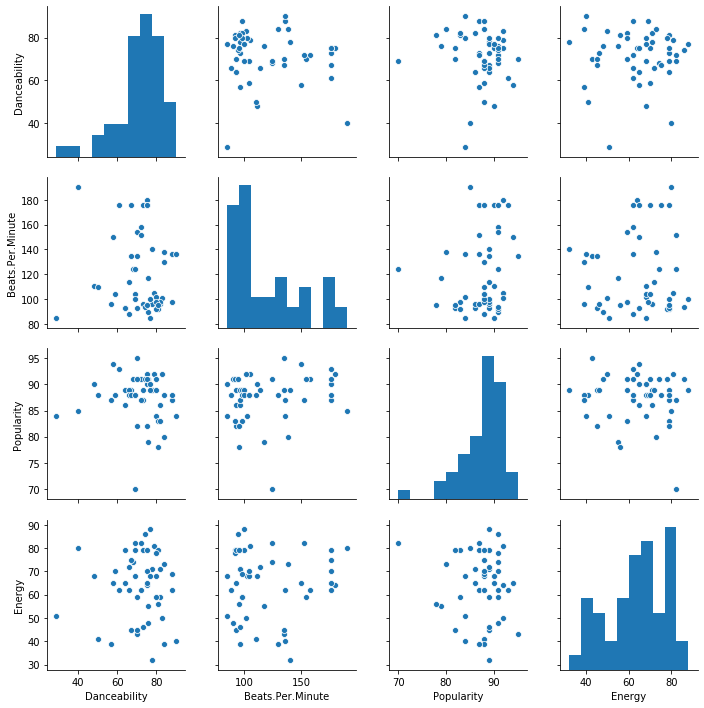

In [71]:
#     • Visualize if there is linear correlation between beats per minutes and popularity, danceability and
#     popularity, energy and popularity
cols = ['Danceability','Beats.Per.Minute','Popularity','Energy']
import seaborn as sns
sns.pairplot(df[cols])

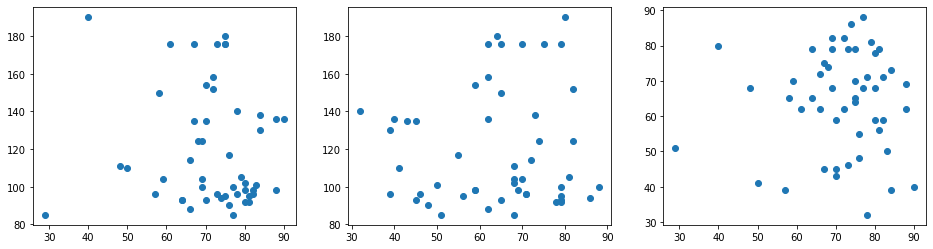

In [91]:
#     • Visualize if there is linear correlation between beats per minutes and popularity, danceability and
#     popularity, energy and popularity
fig, ax = plt.subplots(1, 3, figsize=(16,4))
ax[0].scatter(df['Danceability'],df['Beats.Per.Minute'])
ax[1].scatter(df['Energy'],df['Beats.Per.Minute'])
ax[2].scatter(df['Danceability'],df['Energy'])
plt.show()

In [109]:
## investments.csv 

In [8]:
# 1.Read the given comma separated file (csv) as dataframe.
df = pd.read_csv('investments.csv', encoding = 'latin-1')
print(df.shape)
df.head()

(49438, 14)


,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1,2012.0,0,0
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1,2011.0,0,0
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0


In [9]:
df.dtypes

name                    object
homepage_url            object
category_list           object
 market                 object
 funding_total_usd      object
status                  object
country_code            object
state_code              object
region                  object
city                    object
funding_rounds           int64
founded_year           float64
debt_financing           int64
grant                    int64
dtype: object

In [ ]:
# 2.List out all columns names.
print(df.columns)

# 3.Create a dataframe with numerical columns.
df2 = df.select_dtypes(include=[number])

# 4.Create a dataframe with categorical columns.
df2 = df.select_dtypes(include=['object'])

# 5.Get summary on the data and draw inferences if any.
print(df.describe())

# 6.Display duplicate rows.
print(df[df.duplicated()].shape)
# drop duplicates
print(df.drop_duplicates().shape)

# 7.For each column find out percentage of missing values.
print(round(df.isnull().sum() /df.shape[0] * 100, 2))

# 8.Find count of ‘name’ in each ‘country_code’.
print(df.groupby('country_code')['name'].count())
## quick observations: USA has highest number of companies.

# 9.What is the percentage of the companies which have status ‘acquired’/‘operating’?
print(str(round(df[df.status=='acquired'].shape[0]/df.shape[0]*100,2)) + '% of the companies are acquired.' )
print(str(round(df[df.status=='operating'].shape[0]/df.shape[0]*100,2)) + '% of the companies are operating.' )

# 10.Create a column ‘category_list_count’ having count of category lists.
df['category_list_count'] = df['category_list'].apply(lambda x: len(str(x).split('|')) - 2)
# df[['category_list','category_list_count']].head()

# 11.Find total ‘fundings’ for each country_code.
import re
df[' funding_total_usd '] = np.where(df[' funding_total_usd ']==' -   ', '0', df[' funding_total_usd '])
df[' funding_total_usd '] = df[' funding_total_usd '].apply(lambda x: re.sub(pattern = ',', repl='', string = x))
df[' funding_total_usd ']  = df[' funding_total_usd '].astype('float')
df.groupby('country_code')[[' funding_total_usd ']].sum()

In [1]:
# 12.Find average ‘fundings’ for each country_code.
# import re
# df[' funding_total_usd '] = np.where(df[' funding_total_usd ']==' -   ', '0', df[' funding_total_usd '])
# df[' funding_total_usd '] = df[' funding_total_usd '].apply(lambda x: re.sub(pattern = ',', repl='', string = x))
# df[' funding_total_usd ']  = df[' funding_total_usd '].astype('float')
df.groupby('country_code')[[' funding_total_usd ']].mean()

NameError: name 'df' is not defined

In [12]:
print(str(round(df[df.status=='acquired'].shape[0]/df.shape[0]*100,2)) + '% of the companies are acquired.' )

7.47% of the companies are acquired.


In [164]:
# 13.Find average ‘fundings’ in each region.
df.groupby('region')[[' funding_total_usd ']].mean()

,funding_total_usd
region,
A Coruna,1.236930e+06
AB - Other,3.296429e+06
AK - Other,2.212500e+06
AL - Other,6.966481e+07
AR - Other,1.458722e+05
...,...
Zhengzhou,5.737911e+06
Zhuhai,7.605386e+07
Zurich,8.193698e+06


In [165]:
# 14.How many companies have got just 1 round of funding?
df[df.funding_rounds==1].shape[0]

32039

In [166]:
# 15.How many companies have ‘debt_financing’ above zero?
df[df.debt_financing > 0].shape[0]

4225

In [168]:
df[['homepage_url']]

,homepage_url
0,http://www.waywire.com
1,http://enjoyandtv.com
2,http://www.rockyourpaper.org
3,http://www.InTouchNetwork.com
4,NaN
...,...
49433,http://www.zzish.com
49434,http://www.zznode.com
49435,http://www.zzzzapp.com
49436,http://www.alistgames.com


In [181]:
# 16.Create a column ‘homepage’ to store company name from ‘homepage_url’: 
# For example: If url is http://www.waywire.com, name is waywire.

# df['homepage_M1'] = df.homepage_url.apply(lambda x : x.split('.')[-2] if '.' in x else x)
df['homepage_M2'] = df.homepage_url.apply(lambda x : re.sub("(http://www.|http://|.com|.org|)", '', str(x)))
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,homepage_M2
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,waywire
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,enjoyandtv
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,rockyourpaper
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,InTouchNetwork
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,nan


In [185]:
# 17.Find count of companies in each of the market.
df.groupby(' market ')['name'].count()

 market 
 3D                25
 3D Printing        9
 3D Technology      8
 Accounting        18
 Ad Targeting      13
                   ..
 iOS               48
 iPad              29
 iPhone            69
 iPod Touch         3
 mHealth            8
Name: name, Length: 753, dtype: int64

In [7]:
# 18.Rename ' funding_total_usd ' to 'funding_total_usd'

df.rename(columns = {' funding_total_usd ':'funding_total_usd'}, inplace = True)

In [187]:
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,homepage_M2
0,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012.0,0,0,waywire
1,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,0,0,enjoyandtv
2,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,2012.0,0,0,rockyourpaper
3,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,2011.0,0,0,InTouchNetwork
4,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014.0,0,0,nan


In [192]:
df[df.city.isnull()].head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_year,debt_financing,grant,homepage_M2
7,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,2000000.0,operating,NaN,NaN,NaN,NaN,1,2007.0,0,0,0-6
18,1000 Markets,http://www.1000markets.com,|Marketplaces|Art|E-Commerce|,Marketplaces,500000.0,acquired,NaN,NaN,NaN,NaN,1,2009.0,0,0,1000markets
24,100du.tv,http://www.100du.com,|Hospitality|,Hospitality,3000000.0,operating,NaN,NaN,NaN,NaN,2,NaN,0,0,100du
31,10sec,http://10s.ec/,|Social Commerce|E-Commerce|Mobile Commerce|,Mobile Commerce,1600000.0,operating,NaN,NaN,NaN,NaN,2,2013.0,0,0,10s.ec/
36,115 network disks,http://www.115.com/,|Education|,Education,0.0,operating,NaN,NaN,NaN,NaN,1,NaN,0,0,115/


In [197]:
# df[df.city=='other'].shape

In [196]:
# 19.For each row in column ‘funding_total_usd’, calculate actual – average value for each group ‘city’
df['city'] = df['city'].fillna('other')
df.groupby('city')['funding_total_usd'].transform(lambda x : x - np.mean(x))

0       -2.444616e+07
1       -7.234447e+06
2       -1.723232e+06
3       -6.784773e+06
4       -3.522942e+07
             ...     
49433   -7.964773e+06
49434   -2.591016e+07
49435    5.826533e+04
49436    3.434537e+06
49437    1.880384e+07
Name: funding_total_usd, Length: 49438, dtype: float64

In [200]:
# 20.What is average ‘funding_Total_used’ for each city?
df.groupby('city')['funding_total_usd'].mean()

city
's-hertogenbosch    0.000000e+00
6 October City      1.450000e+05
A Coruña            1.236930e+06
Aachen              6.448845e+06
Aalborg             1.166667e+05
                        ...     
Évora               0.000000e+00
Évry                2.212513e+05
Ísafjörður          4.000000e+06
Örnsköldsvik        0.000000e+00
Østerby Havn        8.550000e+05
Name: funding_total_usd, Length: 4189, dtype: float64

In [9]:
# 21.Plot histogram/distribution of ‘funding_total_usd’ and provide insights if any.
df.funding_total_usd.hist()
plt.xscale('log')


AttributeError: 'DataFrame' object has no attribute 'funding_total_usd'

In [10]:
import seaborn as sns

In [11]:
np.log1p(df.funding_total_usd).hist()

AttributeError: 'DataFrame' object has no attribute 'funding_total_usd'

In [2]:
sns.distplot(np.log1p(df.funding_total_usd))

NameError: name 'sns' is not defined

In [207]:
# 22.What is maximum ‘funding_total_usd’ for each market status?

df.groupby('status')['funding_total_usd'].max()

status
acquired     5.700000e+09
closed       1.567504e+09
operating    3.007950e+10
Name: funding_total_usd, dtype: float64

In [208]:
# 23.How many years it have been since each company was founded?

2020 - df['founded_year']

0         8.0
1         NaN
2         8.0
3         9.0
4         6.0
         ... 
49433     7.0
49434     NaN
49435     8.0
49436     NaN
49437    21.0
Name: founded_year, Length: 49438, dtype: float64

In [211]:
from datetime import date
date.today().year  - df['founded_year']

0         8.0
1         NaN
2         8.0
3         9.0
4         6.0
         ... 
49433     7.0
49434     NaN
49435     8.0
49436     NaN
49437    21.0
Name: founded_year, Length: 49438, dtype: float64

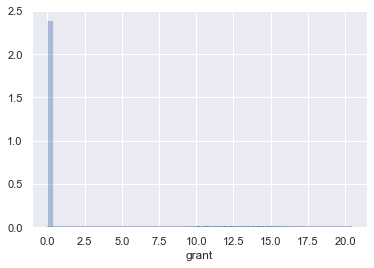

In [212]:
# 24.Visualize ‘grant’ distribution.
sns.distplot(np.log1p(df.grant))

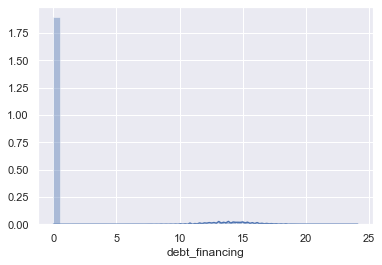

In [213]:
# 25.Visualize ‘debt_financing’ distribution.
sns.distplot(np.log1p(df.debt_financing))

In [10]:
df2 = df.select_dtypes(include=[number])

NameError: name 'number' is not defined